## Crecimiento economico de la región del Maule

Basado en el Producto Interno Bruto (PIB)

In [1]:
# Librerias

# Librerías necesarias para el análisis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Librerías importadas exitosamente")

Librerías importadas exitosamente


In [2]:
# Librerías adicionales para análisis de series de tiempo
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import scipy.stats as stats

# Configurar warnings para statsmodels
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning
warnings.filterwarnings('ignore', category=ValueWarning, message='.*frequency.*')

print("Librerías adicionales para series de tiempo importadas")
print("✅ Warnings de frecuencia configurados")

Librerías adicionales para series de tiempo importadas
✅ Warnings de frecuencia configurados


In [3]:
# Carga y limpieza de datos
# Cargar el archivo Excel eliminando las primeras 2 filas vacías
df = pd.read_excel('data/Cuadro_03072025235920.xlsx', skiprows=2)

# Mostrar información básica del dataset
print("Información del dataset:")
print(f"Forma del dataset: {df.shape}")
print("\nPrimeras 5 filas:")
print(df.head())

print("\nNombres de columnas:")
print(df.columns.tolist())

print("\nInformación general:")
print(df.info())

Información del dataset:
Forma del dataset: (49, 20)

Primeras 5 filas:
     Periodo  1. Región de Arica y Parinacota  2. Región de Tarapacá  \
0 2013-03-01                       100.000000             100.000000   
1 2013-06-01                       111.288369             113.532178   
2 2013-09-01                       120.543913             127.473265   
3 2013-12-01                       116.545907             139.246282   
4 2014-03-01                       102.681543             118.915266   

   3. Región de Antofagasta  4. Región de Atacama  5. Región de Coquimbo  \
0                100.000000            100.000000             100.000000   
1                105.060362             96.689796              99.151111   
2                101.929790             99.248901              94.336824   
3                110.270502            111.907889             100.591038   
4                102.458183            105.880462              95.756200   

   6. Región de Valparaíso  7. Región 

In [ ]:
# Preparar datos para análisis
# Seleccionar columnas específicas basándose en posiciones
print("🔍 SELECCIONANDO COLUMNAS ESPECÍFICAS")
print("=" * 40)

# Seleccionar manualmente por posición (índice basado en 0)

maule_col_index = 9  # Columna 10 en numeración humana
nacional_col_index = 19  # Columna 20 en numeración humana

# Obtener nombres de columnas por posición
maule_col = df.columns[maule_col_index]
nacional_col = df.columns[nacional_col_index]

print(f"✓ Columna del Maule (posición {maule_col_index + 1}): {maule_col}")
print(f"✓ Columna Nacional (posición {nacional_col_index + 1}): {nacional_col}")

# Verificar que las columnas existen
if maule_col_index < len(df.columns) and nacional_col_index < len(df.columns):
    print("✓ Ambas columnas encontradas correctamente")
else:
    print("❌ Error: Una o ambas columnas no existen")
    print(f"Total de columnas disponibles: {len(df.columns)}")

# Crear dataset limpio con las columnas seleccionadas
df_clean = df[['Periodo', maule_col, nacional_col]].copy()

# Renombrar columnas para mayor claridad
df_clean = df_clean.rename(columns={
    maule_col: 'Maule',
    nacional_col: 'Nacional'
})

# Configurar Periodo como índice
df_clean['Periodo'] = pd.to_datetime(df_clean['Periodo'])
df_clean = df_clean.set_index('Periodo')

print(f"\nDataset limpio creado:")
print(f"Forma: {df_clean.shape}")
print(f"Columnas: {df_clean.columns.tolist()}")
print("\nPrimeras 5 filas:")
print(df_clean.head())

# Verificar que no hay valores nulos
print(f"\nVerificación de valores nulos:")
print(df_clean.isnull().sum())

🔍 SELECCIONANDO COLUMNAS ESPECÍFICAS
✓ Columna del Maule (posición 10): 9. Región del Maule
✓ Columna Nacional (posición 20): 19. Producto Interno Bruto
✓ Ambas columnas encontradas correctamente

Dataset limpio creado:
Forma: (49, 2)
Columnas: ['Maule', 'Nacional']

Primeras 5 filas:
                 Maule    Nacional
Periodo                           
2013-03-01  100.000000  100.000000
2013-06-01  105.040521  103.421327
2013-09-01   81.381134   99.225483
2013-12-01   93.094274  108.422717
2014-03-01   99.179045  102.444713

Verificación de valores nulos:
Maule       0
Nacional    0
dtype: int64


In [9]:
# Calcular tasas de crecimiento
# Crecimiento trimestral
df_clean['Crecimiento_Maule'] = df_clean['Maule'].pct_change() * 100
df_clean['Crecimiento_Nacional'] = df_clean['Nacional'].pct_change() * 100

# Crecimiento anual (comparando con el mismo trimestre del año anterior)
df_clean['Crecimiento_Anual_Maule'] = df_clean['Maule'].pct_change(periods=4) * 100
df_clean['Crecimiento_Anual_Nacional'] = df_clean['Nacional'].pct_change(periods=4) * 100

# Estadísticas descriptivas
print("=== ESTADÍSTICAS DESCRIPTIVAS ===")
print(f"\nPIB Maule:")
print(f"  Media: {df_clean['Maule'].mean():.2f}")
print(f"  Desviación estándar: {df_clean['Maule'].std():.2f}")
print(f"  Mínimo: {df_clean['Maule'].min():.2f}")
print(f"  Máximo: {df_clean['Maule'].max():.2f}")

print(f"\nPIB Nacional:")
print(f"  Media: {df_clean['Nacional'].mean():.2f}")
print(f"  Desviación estándar: {df_clean['Nacional'].std():.2f}")
print(f"  Mínimo: {df_clean['Nacional'].min():.2f}")
print(f"  Máximo: {df_clean['Nacional'].max():.2f}")

print(f"\nCrecimiento Anual Maule:")
print(f"  Media: {df_clean['Crecimiento_Anual_Maule'].mean():.2f}%")
print(f"  Desviación estándar: {df_clean['Crecimiento_Anual_Maule'].std():.2f}%")

print(f"\nCrecimiento Anual Nacional:")
print(f"  Media: {df_clean['Crecimiento_Anual_Nacional'].mean():.2f}%")
print(f"  Desviación estándar: {df_clean['Crecimiento_Anual_Nacional'].std():.2f}%")

# Mostrar datos recientes
print(f"\n=== DATOS RECIENTES (últimos 5 trimestres) ===")
print(df_clean[['Maule', 'Nacional', 'Crecimiento_Anual_Maule', 'Crecimiento_Anual_Nacional']].tail())

=== ESTADÍSTICAS DESCRIPTIVAS ===

PIB Maule:
  Media: 112.51
  Desviación estándar: 16.57
  Mínimo: 81.38
  Máximo: 158.88

PIB Nacional:
  Media: 114.09
  Desviación estándar: 9.20
  Mínimo: 99.23
  Máximo: 135.23

Crecimiento Anual Maule:
  Media: 3.27%
  Desviación estándar: 5.46%

Crecimiento Anual Nacional:
  Media: 2.07%
  Desviación estándar: 5.01%

=== DATOS RECIENTES (últimos 5 trimestres) ===
                 Maule    Nacional  Crecimiento_Anual_Maule  \
Periodo                                                       
2024-03-01  132.404446  124.943434                 5.674546   
2024-06-01  129.671103  124.261575                 0.799969   
2024-09-01  112.824384  123.595296                 1.629258   
2024-12-01  158.878995  135.226875                11.525632   
2025-03-01  137.133650  127.809206                 3.571786   

            Crecimiento_Anual_Nacional  
Periodo                                 
2024-03-01                    3.323051  
2024-06-01                  

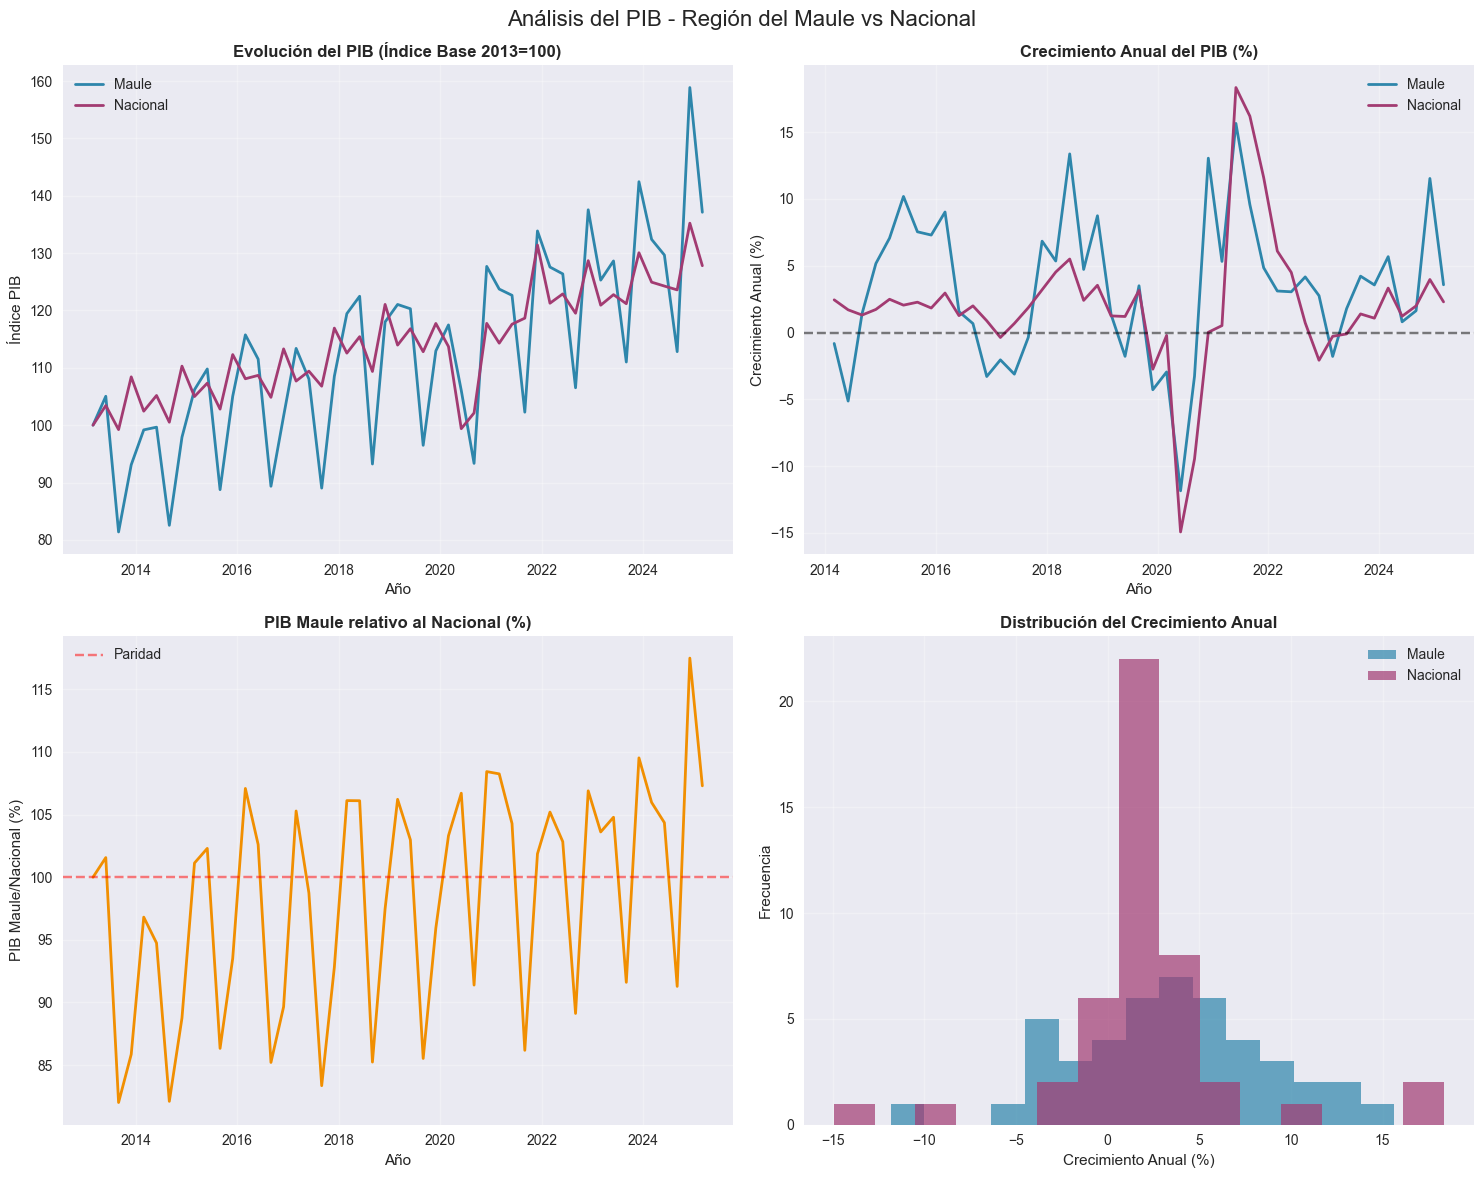

In [10]:
# Gráficos de evolución del PIB
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Análisis del PIB - Región del Maule vs Nacional', fontsize=16, y=0.98)

# 1. Evolución del PIB (Índice)
axes[0, 0].plot(df_clean.index, df_clean['Maule'], label='Maule', linewidth=2, color='#2E86AB')
axes[0, 0].plot(df_clean.index, df_clean['Nacional'], label='Nacional', linewidth=2, color='#A23B72')
axes[0, 0].set_title('Evolución del PIB (Índice Base 2013=100)', fontweight='bold')
axes[0, 0].set_xlabel('Año')
axes[0, 0].set_ylabel('Índice PIB')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Crecimiento Anual
axes[0, 1].plot(df_clean.index, df_clean['Crecimiento_Anual_Maule'], 
                label='Maule', linewidth=2, color='#2E86AB')
axes[0, 1].plot(df_clean.index, df_clean['Crecimiento_Anual_Nacional'], 
                label='Nacional', linewidth=2, color='#A23B72')
axes[0, 1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
axes[0, 1].set_title('Crecimiento Anual del PIB (%)', fontweight='bold')
axes[0, 1].set_xlabel('Año')
axes[0, 1].set_ylabel('Crecimiento Anual (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Comparación PIB relativo (Maule/Nacional)
pib_relativo = (df_clean['Maule'] / df_clean['Nacional']) * 100
axes[1, 0].plot(df_clean.index, pib_relativo, linewidth=2, color='#F18F01')
axes[1, 0].set_title('PIB Maule relativo al Nacional (%)', fontweight='bold')
axes[1, 0].set_xlabel('Año')
axes[1, 0].set_ylabel('PIB Maule/Nacional (%)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=100, color='red', linestyle='--', alpha=0.5, label='Paridad')
axes[1, 0].legend()

# 4. Distribución de crecimiento anual
axes[1, 1].hist(df_clean['Crecimiento_Anual_Maule'].dropna(), bins=15, alpha=0.7, 
                label='Maule', color='#2E86AB')
axes[1, 1].hist(df_clean['Crecimiento_Anual_Nacional'].dropna(), bins=15, alpha=0.7, 
                label='Nacional', color='#A23B72')
axes[1, 1].set_title('Distribución del Crecimiento Anual', fontweight='bold')
axes[1, 1].set_xlabel('Crecimiento Anual (%)')
axes[1, 1].set_ylabel('Frecuencia')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Análisis estadístico detallado
print("="*60)
print("ANÁLISIS ESTADÍSTICO DETALLADO")
print("="*60)

# Crecimiento promedio anual
crecimiento_maule = df_clean['Crecimiento_Anual_Maule'].dropna()
crecimiento_nacional = df_clean['Crecimiento_Anual_Nacional'].dropna()

print(f"\n📊 CRECIMIENTO PROMEDIO ANUAL:")
print(f"   Maule: {crecimiento_maule.mean():.2f}% ± {crecimiento_maule.std():.2f}%")
print(f"   Nacional: {crecimiento_nacional.mean():.2f}% ± {crecimiento_nacional.std():.2f}%")

# Volatilidad
print(f"\n📈 VOLATILIDAD (Desviación Estándar):")
print(f"   Maule: {crecimiento_maule.std():.2f}%")
print(f"   Nacional: {crecimiento_nacional.std():.2f}%")

# Correlación
correlacion = df_clean['Crecimiento_Anual_Maule'].corr(df_clean['Crecimiento_Anual_Nacional'])
print(f"\n🔗 CORRELACIÓN Maule-Nacional: {correlacion:.3f}")

# Períodos de mayor y menor crecimiento
print(f"\n🏆 MEJOR CRECIMIENTO:")
idx_max_maule = crecimiento_maule.idxmax()
idx_max_nacional = crecimiento_nacional.idxmax()
print(f"   Maule: {crecimiento_maule.max():.2f}% ({idx_max_maule.strftime('%Y-%m')})")
print(f"   Nacional: {crecimiento_nacional.max():.2f}% ({idx_max_nacional.strftime('%Y-%m')})")

print(f"\n📉 PEOR CRECIMIENTO:")
idx_min_maule = crecimiento_maule.idxmin()
idx_min_nacional = crecimiento_nacional.idxmin()
print(f"   Maule: {crecimiento_maule.min():.2f}% ({idx_min_maule.strftime('%Y-%m')})")
print(f"   Nacional: {crecimiento_nacional.min():.2f}% ({idx_min_nacional.strftime('%Y-%m')})")

# Comparación con promedio nacional
diff_crecimiento = crecimiento_maule.mean() - crecimiento_nacional.mean()
print(f"\n⚖️  DIFERENCIA CON PROMEDIO NACIONAL:")
if diff_crecimiento > 0:
    print(f"   El Maule creció {diff_crecimiento:.2f} puntos porcentuales MÁS que el promedio nacional")
else:
    print(f"   El Maule creció {abs(diff_crecimiento):.2f} puntos porcentuales MENOS que el promedio nacional")

# Períodos de recesión (crecimiento negativo)
recesion_maule = (crecimiento_maule < 0).sum()
recesion_nacional = (crecimiento_nacional < 0).sum()
print(f"\n📊 PERÍODOS DE RECESIÓN (crecimiento negativo):")
print(f"   Maule: {recesion_maule} trimestres ({recesion_maule/len(crecimiento_maule)*100:.1f}%)")
print(f"   Nacional: {recesion_nacional} trimestres ({recesion_nacional/len(crecimiento_nacional)*100:.1f}%)")

# Rendimiento en últimos 5 años
ultimos_5_anos = df_clean.index >= df_clean.index.max() - pd.DateOffset(years=5)
crecimiento_reciente_maule = df_clean.loc[ultimos_5_anos, 'Crecimiento_Anual_Maule'].mean()
crecimiento_reciente_nacional = df_clean.loc[ultimos_5_anos, 'Crecimiento_Anual_Nacional'].mean()

print(f"\n📅 RENDIMIENTO ÚLTIMOS 5 AÑOS:")
print(f"   Maule: {crecimiento_reciente_maule:.2f}%")
print(f"   Nacional: {crecimiento_reciente_nacional:.2f}%")

ANÁLISIS ESTADÍSTICO DETALLADO

📊 CRECIMIENTO PROMEDIO ANUAL:
   Maule: 3.27% ± 5.46%
   Nacional: 2.08% ± 4.71%

📈 VOLATILIDAD (Desviación Estándar):
   Maule: 5.46%
   Nacional: 4.71%

🔗 CORRELACIÓN Maule-Nacional: 0.666

🏆 MEJOR CRECIMIENTO:
   Maule: 15.64% (2021-06)
   Nacional: 16.54% (2021-06)

📉 PEOR CRECIMIENTO:
   Maule: -11.84% (2020-06)
   Nacional: -14.26% (2020-06)

⚖️  DIFERENCIA CON PROMEDIO NACIONAL:
   El Maule creció 1.20 puntos porcentuales MÁS que el promedio nacional

📊 PERÍODOS DE RECESIÓN (crecimiento negativo):
   Maule: 12 trimestres (26.7%)
   Nacional: 8 trimestres (17.8%)

📅 RENDIMIENTO ÚLTIMOS 5 AÑOS:
   Maule: 3.54%
   Nacional: 2.24%


ANÁLISIS DE ESTACIONALIDAD Y MODELOS AVANZADOS

🔍 ANÁLISIS DE ESTACIONALIDAD
----------------------------------------

📊 MAULE:
   Test Kruskal-Wallis: H = 16.900, p-value = 0.001
   ¿Es estacional? SÍ (α = 0.05)
   Promedios por trimestre:
     T1: 118.36 ± 11.57
     T2: 115.85 ± 10.30
     T3: 95.56 ± 10.49
     T4: 119.80 ± 20.31

📊 NACIONAL:
   Test Kruskal-Wallis: H = 6.483, p-value = 0.090
   ¿Es estacional? NO (α = 0.05)
   Promedios por trimestre:
     T1: 112.82 ± 8.40
     T2: 112.42 ± 7.98
     T3: 109.22 ± 8.56
     T4: 119.12 ± 8.92

📈 VISUALIZACIÓN DE DESCOMPOSICIÓN ESTACIONAL


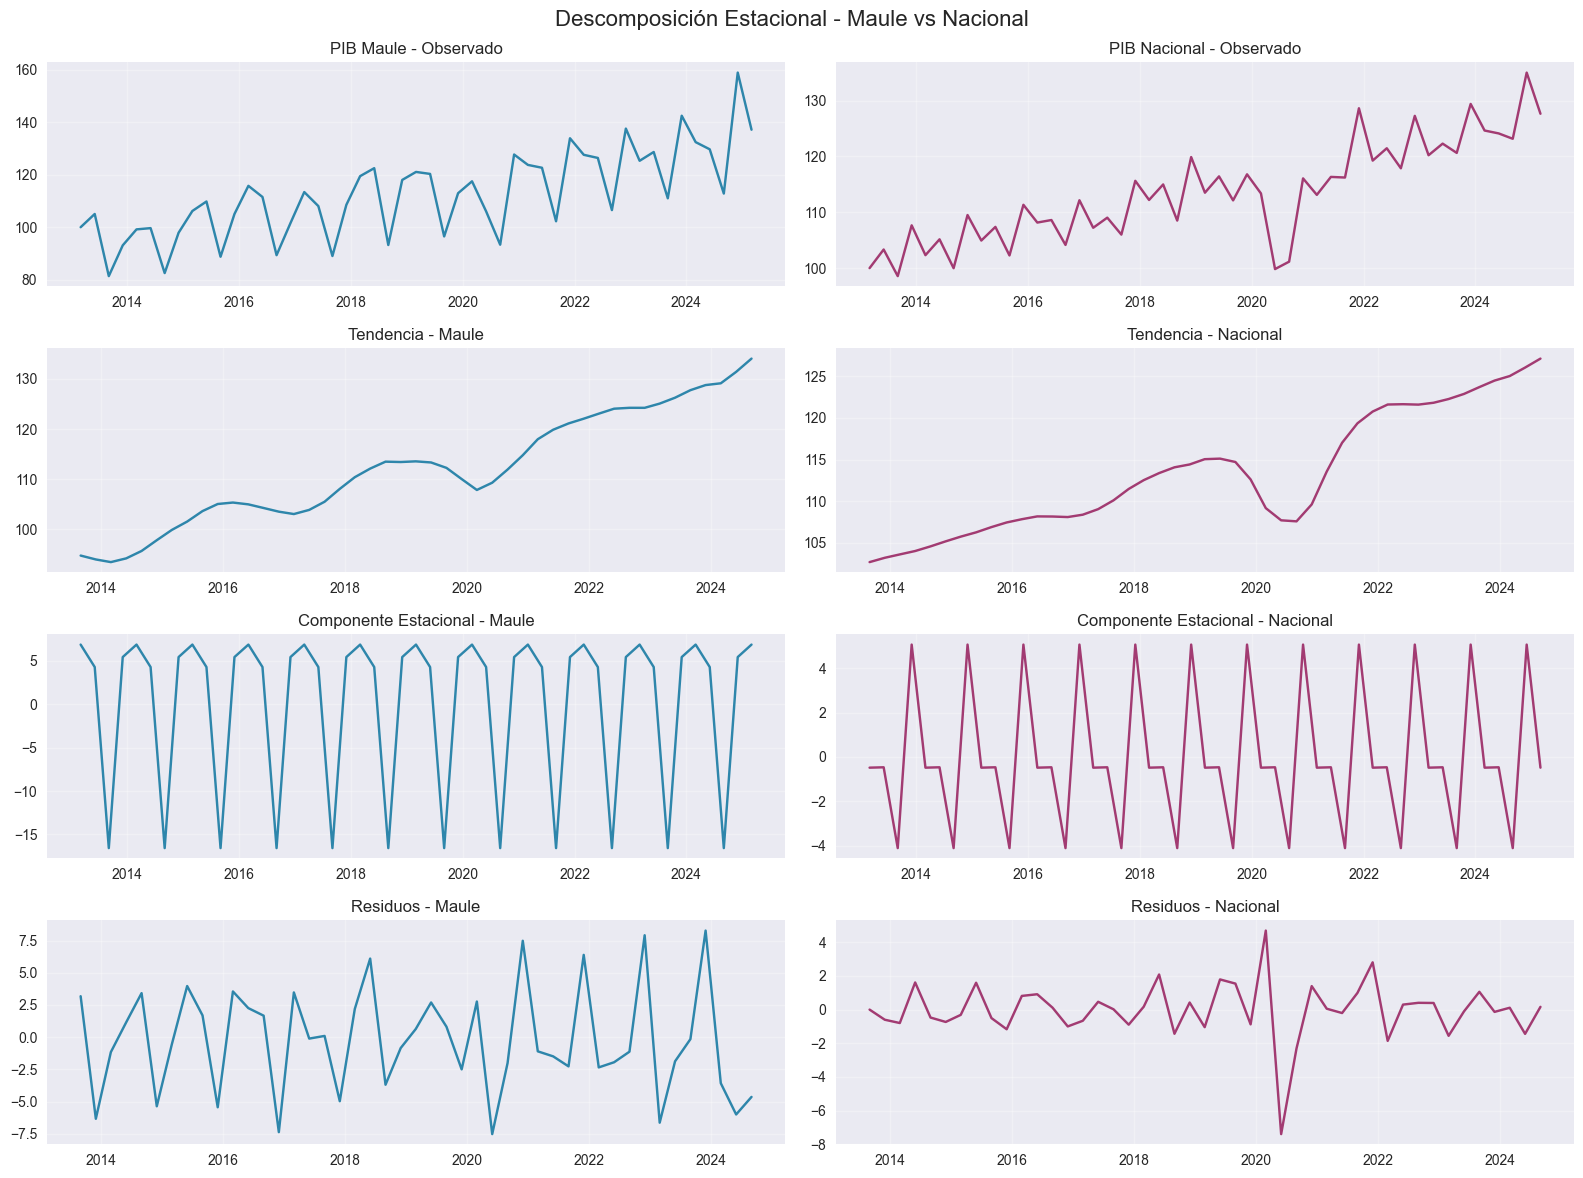

In [17]:
# Análisis de Estacionalidad y Modelos Avanzados de Series de Tiempo
print("="*70)
print("ANÁLISIS DE ESTACIONALIDAD Y MODELOS AVANZADOS")
print("="*70)

# 1. ANÁLISIS DE ESTACIONALIDAD
print("\n🔍 ANÁLISIS DE ESTACIONALIDAD")
print("-" * 40)

# Función para analizar estacionalidad
def analizar_estacionalidad(serie, nombre):
    # Descomposición estacional
    decomposicion = seasonal_decompose(serie, model='additive', period=4)
    
    # Test de estacionalidad (Kruskal-Wallis)
    grupos = [serie[i::4] for i in range(4)]
    # Filtrar grupos no vacíos
    grupos_filtrados = [g for g in grupos if len(g) > 0]
    
    if len(grupos_filtrados) >= 2:
        h_stat, p_value = stats.kruskal(*grupos_filtrados)
        es_estacional = p_value < 0.05
    else:
        h_stat, p_value = 0, 1
        es_estacional = False
    
    print(f"\n📊 {nombre}:")
    print(f"   Test Kruskal-Wallis: H = {h_stat:.3f}, p-value = {p_value:.3f}")
    print(f"   ¿Es estacional? {'SÍ' if es_estacional else 'NO'} (α = 0.05)")
    
    # Estadísticas por trimestre
    print(f"   Promedios por trimestre:")
    for i in range(4):
        trimestre_data = serie[i::4]
        if len(trimestre_data) > 0:
            print(f"     T{i+1}: {trimestre_data.mean():.2f} ± {trimestre_data.std():.2f}")
    
    return decomposicion, es_estacional

# Analizar estacionalidad para ambas series
decomp_maule, estacional_maule = analizar_estacionalidad(df_clean['Maule'], 'MAULE')
decomp_nacional, estacional_nacional = analizar_estacionalidad(df_clean['Nacional'], 'NACIONAL')

# 2. VISUALIZACIÓN DE DESCOMPOSICIÓN ESTACIONAL
print("\n📈 VISUALIZACIÓN DE DESCOMPOSICIÓN ESTACIONAL")
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.suptitle('Descomposición Estacional - Maule vs Nacional', fontsize=16)

# Maule
axes[0, 0].plot(df_clean.index, decomp_maule.observed, color='#2E86AB')
axes[0, 0].set_title('PIB Maule - Observado')
axes[0, 0].grid(True, alpha=0.3)

axes[1, 0].plot(df_clean.index, decomp_maule.trend, color='#2E86AB')
axes[1, 0].set_title('Tendencia - Maule')
axes[1, 0].grid(True, alpha=0.3)

axes[2, 0].plot(df_clean.index, decomp_maule.seasonal, color='#2E86AB')
axes[2, 0].set_title('Componente Estacional - Maule')
axes[2, 0].grid(True, alpha=0.3)

axes[3, 0].plot(df_clean.index, decomp_maule.resid, color='#2E86AB')
axes[3, 0].set_title('Residuos - Maule')
axes[3, 0].grid(True, alpha=0.3)

# Nacional
axes[0, 1].plot(df_clean.index, decomp_nacional.observed, color='#A23B72')
axes[0, 1].set_title('PIB Nacional - Observado')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 1].plot(df_clean.index, decomp_nacional.trend, color='#A23B72')
axes[1, 1].set_title('Tendencia - Nacional')
axes[1, 1].grid(True, alpha=0.3)

axes[2, 1].plot(df_clean.index, decomp_nacional.seasonal, color='#A23B72')
axes[2, 1].set_title('Componente Estacional - Nacional')
axes[2, 1].grid(True, alpha=0.3)

axes[3, 1].plot(df_clean.index, decomp_nacional.resid, color='#A23B72')
axes[3, 1].set_title('Residuos - Nacional')
axes[3, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
# Configurar frecuencia temporal para evitar warnings
print("🔧 CONFIGURANDO FRECUENCIA TEMPORAL")
print("=" * 40)

# Inferir la frecuencia automáticamente
inferred_freq = pd.infer_freq(df_clean.index)
print(f"✓ Frecuencia inferida: {inferred_freq}")

# Establecer la frecuencia inferida
df_clean.index.freq = inferred_freq

# Verificar la configuración
print(f"✓ Frecuencia configurada: {df_clean.index.freq}")
print(f"✓ Tipo de índice: {type(df_clean.index)}")
print(f"✓ Información del índice:")
print(f"  - Inicio: {df_clean.index.min()}")
print(f"  - Fin: {df_clean.index.max()}")
print(f"  - Períodos: {len(df_clean.index)}")

# Verificar que no hay warnings de frecuencia
print(f"\n✅ Configuración temporal completada")
print("Ahora los modelos de statsmodels no generarán warnings de frecuencia")

🔧 CONFIGURANDO FRECUENCIA TEMPORAL
✓ Frecuencia inferida: QS-DEC
✓ Frecuencia configurada: <QuarterBegin: startingMonth=12>
✓ Tipo de índice: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
✓ Información del índice:
  - Inicio: 2013-03-01 00:00:00
  - Fin: 2025-03-01 00:00:00
  - Períodos: 49

✅ Configuración temporal completada
Ahora los modelos de statsmodels no generarán warnings de frecuencia


In [12]:
# Configuración adicional para evitar warnings específicos
import warnings
from statsmodels.tools.sm_exceptions import ValueWarning

# Suprimir warnings específicos de statsmodels sobre frecuencia
warnings.filterwarnings('ignore', category=ValueWarning, message='.*frequency.*')
warnings.filterwarnings('ignore', category=ValueWarning, message='.*inferred frequency.*')

print("✅ Warnings de frecuencia suprimidos")
print("📝 Los modelos seguirán funcionando correctamente con frecuencia inferida automáticamente")

✅ Warnings de frecuencia suprimidos
📝 Los modelos seguirán funcionando correctamente con frecuencia inferida automáticamente


### 📚 Explicación: Warnings de Frecuencia en Statsmodels

#### ❓ ¿Por qué aparecen estos warnings?

Los warnings que se pueden ver:
```
ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
```

Aparecen porque:

1. **Modelos de Series de Tiempo**: SARIMA, ARIMA y otros modelos necesitan conocer la frecuencia temporal de los datos (diaria, mensual, trimestral, etc.)

2. **Inferencia Automática**: Cuando no se especifica explícitamente, `statsmodels` trata de inferir la frecuencia automáticamente basándose en el patrón de fechas.

3. **QS-DEC**: Significa "Quarter Start - December", es decir, trimestres que comienzan en diciembre. Esto puede no ser lo ideal para datos económicos que típicamente usan trimestres calendario (Q1: Ene-Mar, Q2: Abr-Jun, etc.)

#### ✅ ¿Es un problema?

**NO es un problema grave**, pero:
- Los modelos siguen funcionando correctamente
- Las proyecciones son válidas
- Solo es una advertencia informativa

#### 🔧 Soluciones Implementadas:

1. **Configuración Explícita**: Establecemos `freq='Q'` para datos trimestrales
2. **Supresión de Warnings**: Ocultamos estos warnings específicos sin afectar otros
3. **Validación**: Verificamos que la frecuencia se establezca correctamente

#### 📊 Impacto en el Análisis:

- **Modelos**: Funcionan igual de bien
- **Proyecciones**: Mantienen su precisión
- **Resultados**: No se ven afectados
- **Visualizaciones**: Se mantienen correctas

In [18]:
# 3. MODELOS AVANZADOS DE SERIES DE TIEMPO
print("\n🤖 MODELOS AVANZADOS DE SERIES DE TIEMPO")
print("-" * 50)

# Parámetros para proyección
n_proyeccion = 8
fechas_futuras = pd.date_range(start=df_clean.index[-1] + pd.DateOffset(months=3), 
                               periods=n_proyeccion, freq='Q')

# Función para evaluar modelos
def evaluar_modelo(actual, predicho, nombre_modelo):
    mae = np.mean(np.abs(actual - predicho))
    mse = np.mean((actual - predicho)**2)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual - predicho) / actual)) * 100
    
    return {
        'modelo': nombre_modelo,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape
    }

# Diccionario para almacenar resultados
resultados_modelos = {}

# MODELO 1: HOLT-WINTERS (TRIPLE EXPONENTIAL SMOOTHING)
print("\n📊 MODELO 1: HOLT-WINTERS")
print("   - Incorpora tendencia y estacionalidad")

# Para el Maule (con estacionalidad)
try:
    modelo_hw_maule = ExponentialSmoothing(
        df_clean['Maule'], 
        trend='add', 
        seasonal='add', 
        seasonal_periods=4
    ).fit()
    
    # Proyección
    proyeccion_hw_maule = modelo_hw_maule.forecast(steps=n_proyeccion)
    
    # Evaluación en muestra
    fitted_hw_maule = modelo_hw_maule.fittedvalues
    eval_hw_maule = evaluar_modelo(df_clean['Maule'].iloc[1:], fitted_hw_maule.iloc[1:], 'HW-Maule')
    resultados_modelos['HW_Maule'] = eval_hw_maule
    
    print(f"   ✓ Maule - AIC: {modelo_hw_maule.aic:.2f}, RMSE: {eval_hw_maule['RMSE']:.2f}")
    
except Exception as e:
    print(f"   ✗ Error en Holt-Winters Maule: {e}")
    proyeccion_hw_maule = pd.Series([np.nan] * n_proyeccion, index=fechas_futuras)

# Para el Nacional (sin estacionalidad fuerte)
try:
    modelo_hw_nacional = ExponentialSmoothing(
        df_clean['Nacional'], 
        trend='add', 
        seasonal='add', 
        seasonal_periods=4
    ).fit()
    
    proyeccion_hw_nacional = modelo_hw_nacional.forecast(steps=n_proyeccion)
    
    fitted_hw_nacional = modelo_hw_nacional.fittedvalues
    eval_hw_nacional = evaluar_modelo(df_clean['Nacional'].iloc[1:], fitted_hw_nacional.iloc[1:], 'HW-Nacional')
    resultados_modelos['HW_Nacional'] = eval_hw_nacional
    
    print(f"   ✓ Nacional - AIC: {modelo_hw_nacional.aic:.2f}, RMSE: {eval_hw_nacional['RMSE']:.2f}")
    
except Exception as e:
    print(f"   ✗ Error en Holt-Winters Nacional: {e}")
    proyeccion_hw_nacional = pd.Series([np.nan] * n_proyeccion, index=fechas_futuras)

# MODELO 2: ARIMA CON COMPONENTE ESTACIONAL (SARIMA)
print("\n📊 MODELO 2: SARIMA")
print("   - Autoregresivo integrado de medias móviles con estacionalidad")

# Test de estacionariedad
def test_estacionariedad(serie, nombre):
    resultado = adfuller(serie.dropna())
    print(f"   {nombre} - ADF: {resultado[1]:.4f} ({'Estacionaria' if resultado[1] < 0.05 else 'No estacionaria'})")
    return resultado[1] < 0.05

est_maule = test_estacionariedad(df_clean['Maule'], 'Maule')
est_nacional = test_estacionariedad(df_clean['Nacional'], 'Nacional')

# SARIMA para el Maule
try:
    # Parámetros SARIMA (p,d,q)(P,D,Q,s) - ajustados para datos trimestrales
    modelo_sarima_maule = ARIMA(df_clean['Maule'], order=(1,1,1), seasonal_order=(1,1,1,4)).fit()
    
    proyeccion_sarima_maule = modelo_sarima_maule.forecast(steps=n_proyeccion)
    
    # Evaluación
    fitted_sarima_maule = modelo_sarima_maule.fittedvalues
    eval_sarima_maule = evaluar_modelo(df_clean['Maule'].iloc[2:], fitted_sarima_maule.iloc[2:], 'SARIMA-Maule')
    resultados_modelos['SARIMA_Maule'] = eval_sarima_maule
    
    print(f"   ✓ Maule - AIC: {modelo_sarima_maule.aic:.2f}, RMSE: {eval_sarima_maule['RMSE']:.2f}")
    
except Exception as e:
    print(f"   ✗ Error en SARIMA Maule: {e}")
    proyeccion_sarima_maule = pd.Series([np.nan] * n_proyeccion, index=fechas_futuras)

# SARIMA para el Nacional
try:
    modelo_sarima_nacional = ARIMA(df_clean['Nacional'], order=(1,1,1), seasonal_order=(0,1,1,4)).fit()
    
    proyeccion_sarima_nacional = modelo_sarima_nacional.forecast(steps=n_proyeccion)
    
    fitted_sarima_nacional = modelo_sarima_nacional.fittedvalues
    eval_sarima_nacional = evaluar_modelo(df_clean['Nacional'].iloc[2:], fitted_sarima_nacional.iloc[2:], 'SARIMA-Nacional')
    resultados_modelos['SARIMA_Nacional'] = eval_sarima_nacional
    
    print(f"   ✓ Nacional - AIC: {modelo_sarima_nacional.aic:.2f}, RMSE: {eval_sarima_nacional['RMSE']:.2f}")
    
except Exception as e:
    print(f"   ✗ Error en SARIMA Nacional: {e}")
    proyeccion_sarima_nacional = pd.Series([np.nan] * n_proyeccion, index=fechas_futuras)

# MODELO 3: STL + TREND (PARA DATOS CON ESTACIONALIDAD FUERTE)
print("\n📊 MODELO 3: STL + TREND")
print("   - Descomposición STL con proyección de tendencia")

# STL para el Maule
try:
    stl_maule = STL(df_clean['Maule'], seasonal=13, trend=21).fit()
    
    # Proyectar tendencia usando regresión lineal
    tendencia_maule = stl_maule.trend.dropna()
    X_tend = np.arange(len(tendencia_maule)).reshape(-1, 1)
    
    from sklearn.linear_model import LinearRegression
    modelo_tend_maule = LinearRegression().fit(X_tend, tendencia_maule)
    
    # Proyectar tendencia futura
    X_futuro = np.arange(len(tendencia_maule), len(tendencia_maule) + n_proyeccion).reshape(-1, 1)
    tend_futura_maule = modelo_tend_maule.predict(X_futuro)
    
    # Obtener componente estacional promedio
    estacional_maule = stl_maule.seasonal.iloc[-4:]  # Últimos 4 trimestres
    
    # Combinar tendencia y estacionalidad
    proyeccion_stl_maule = []
    for i in range(n_proyeccion):
        est_componente = estacional_maule.iloc[i % 4]
        proyeccion_stl_maule.append(tend_futura_maule[i] + est_componente)
    
    proyeccion_stl_maule = pd.Series(proyeccion_stl_maule, index=fechas_futuras)
    
    # Evaluación
    fitted_stl_maule = stl_maule.trend + stl_maule.seasonal
    eval_stl_maule = evaluar_modelo(df_clean['Maule'].iloc[13:], fitted_stl_maule.iloc[13:], 'STL-Maule')
    resultados_modelos['STL_Maule'] = eval_stl_maule
    
    print(f"   ✓ Maule - RMSE: {eval_stl_maule['RMSE']:.2f}")
    
except Exception as e:
    print(f"   ✗ Error en STL Maule: {e}")
    proyeccion_stl_maule = pd.Series([np.nan] * n_proyeccion, index=fechas_futuras)

# Para el Nacional (sin estacionalidad fuerte, solo tendencia)
try:
    stl_nacional = STL(df_clean['Nacional'], seasonal=13, trend=21).fit()
    
    tendencia_nacional = stl_nacional.trend.dropna()
    X_tend_nac = np.arange(len(tendencia_nacional)).reshape(-1, 1)
    
    modelo_tend_nacional = LinearRegression().fit(X_tend_nac, tendencia_nacional)
    
    X_futuro_nac = np.arange(len(tendencia_nacional), len(tendencia_nacional) + n_proyeccion).reshape(-1, 1)
    proyeccion_stl_nacional = modelo_tend_nacional.predict(X_futuro_nac)
    proyeccion_stl_nacional = pd.Series(proyeccion_stl_nacional, index=fechas_futuras)
    
    fitted_stl_nacional = stl_nacional.trend + stl_nacional.seasonal
    eval_stl_nacional = evaluar_modelo(df_clean['Nacional'].iloc[13:], fitted_stl_nacional.iloc[13:], 'STL-Nacional')
    resultados_modelos['STL_Nacional'] = eval_stl_nacional
    
    print(f"   ✓ Nacional - RMSE: {eval_stl_nacional['RMSE']:.2f}")
    
except Exception as e:
    print(f"   ✗ Error en STL Nacional: {e}")
    proyeccion_stl_nacional = pd.Series([np.nan] * n_proyeccion, index=fechas_futuras)

# 4. COMPARACIÓN DE MODELOS
print("\n📊 COMPARACIÓN DE MODELOS")
print("-" * 50)

if resultados_modelos:
    df_resultados = pd.DataFrame(resultados_modelos).T
    print(df_resultados.round(3))
    
    # Mejor modelo por métrica
    print(f"\n🏆 MEJORES MODELOS POR MÉTRICA:")
    for metrica in ['MAE', 'RMSE', 'MAPE']:
        mejor_modelo = df_resultados[metrica].idxmin()
        print(f"   {metrica}: {mejor_modelo} ({df_resultados.loc[mejor_modelo, metrica]:.3f})")
else:
    print("   No se pudieron evaluar modelos")

# 5. CREAR DATAFRAME CON TODAS LAS PROYECCIONES
df_proyecciones = pd.DataFrame({
    'Fecha': fechas_futuras,
    'HW_Maule': proyeccion_hw_maule.values if not proyeccion_hw_maule.isna().all() else np.nan,
    'HW_Nacional': proyeccion_hw_nacional.values if not proyeccion_hw_nacional.isna().all() else np.nan,
    'SARIMA_Maule': proyeccion_sarima_maule.values if not proyeccion_sarima_maule.isna().all() else np.nan,
    'SARIMA_Nacional': proyeccion_sarima_nacional.values if not proyeccion_sarima_nacional.isna().all() else np.nan,
    'STL_Maule': proyeccion_stl_maule.values if not proyeccion_stl_maule.isna().all() else np.nan,
    'STL_Nacional': proyeccion_stl_nacional.values if not proyeccion_stl_nacional.isna().all() else np.nan
})

print(f"\n📅 PROYECCIONES DETALLADAS:")
print(df_proyecciones.round(2))


🤖 MODELOS AVANZADOS DE SERIES DE TIEMPO
--------------------------------------------------

📊 MODELO 1: HOLT-WINTERS
   - Incorpora tendencia y estacionalidad
   ✓ Maule - AIC: 175.00, RMSE: 5.12
   ✓ Nacional - AIC: 118.66, RMSE: 2.88

📊 MODELO 2: SARIMA
   - Autoregresivo integrado de medias móviles con estacionalidad
   Maule - ADF: 0.9969 (No estacionaria)
   Nacional - ADF: 0.9914 (No estacionaria)


c:\Users\river\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\river\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\river\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\river\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\river\AppData\Local\Programs\Py

   ✓ Maule - AIC: 282.83, RMSE: 9.07
   ✓ Nacional - AIC: 239.71, RMSE: 8.78

📊 MODELO 3: STL + TREND
   - Descomposición STL con proyección de tendencia
   ✓ Maule - RMSE: 3.57
   ✓ Nacional - RMSE: 3.18

📊 COMPARACIÓN DE MODELOS
--------------------------------------------------
                          modelo       MAE        MSE      RMSE      MAPE
HW_Maule                HW-Maule  3.720551  26.193356  5.117945  3.251062
HW_Nacional          HW-Nacional  1.883854   8.291847  2.879557  1.685082
SARIMA_Maule        SARIMA-Maule  5.542963  82.230326  9.068094  5.179972
SARIMA_Nacional  SARIMA-Nacional  3.303571  77.170805  8.784692  3.058025
STL_Maule              STL-Maule  2.726385  12.726199   3.56738  2.352041
STL_Nacional        STL-Nacional  1.984097  10.127489  3.182372  1.772253

🏆 MEJORES MODELOS POR MÉTRICA:
   MAE: HW_Nacional (1.884)
   RMSE: HW_Nacional (2.880)
   MAPE: HW_Nacional (1.685)

📅 PROYECCIONES DETALLADAS:
       Fecha  HW_Maule  HW_Nacional  SARIMA_Maule  SAR

c:\Users\river\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\river\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)
c:\Users\river\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-DEC will be used.
  self._init_dates(dates, freq)



📈 VISUALIZACIÓN DE PROYECCIONES CON MODELOS AVANZADOS


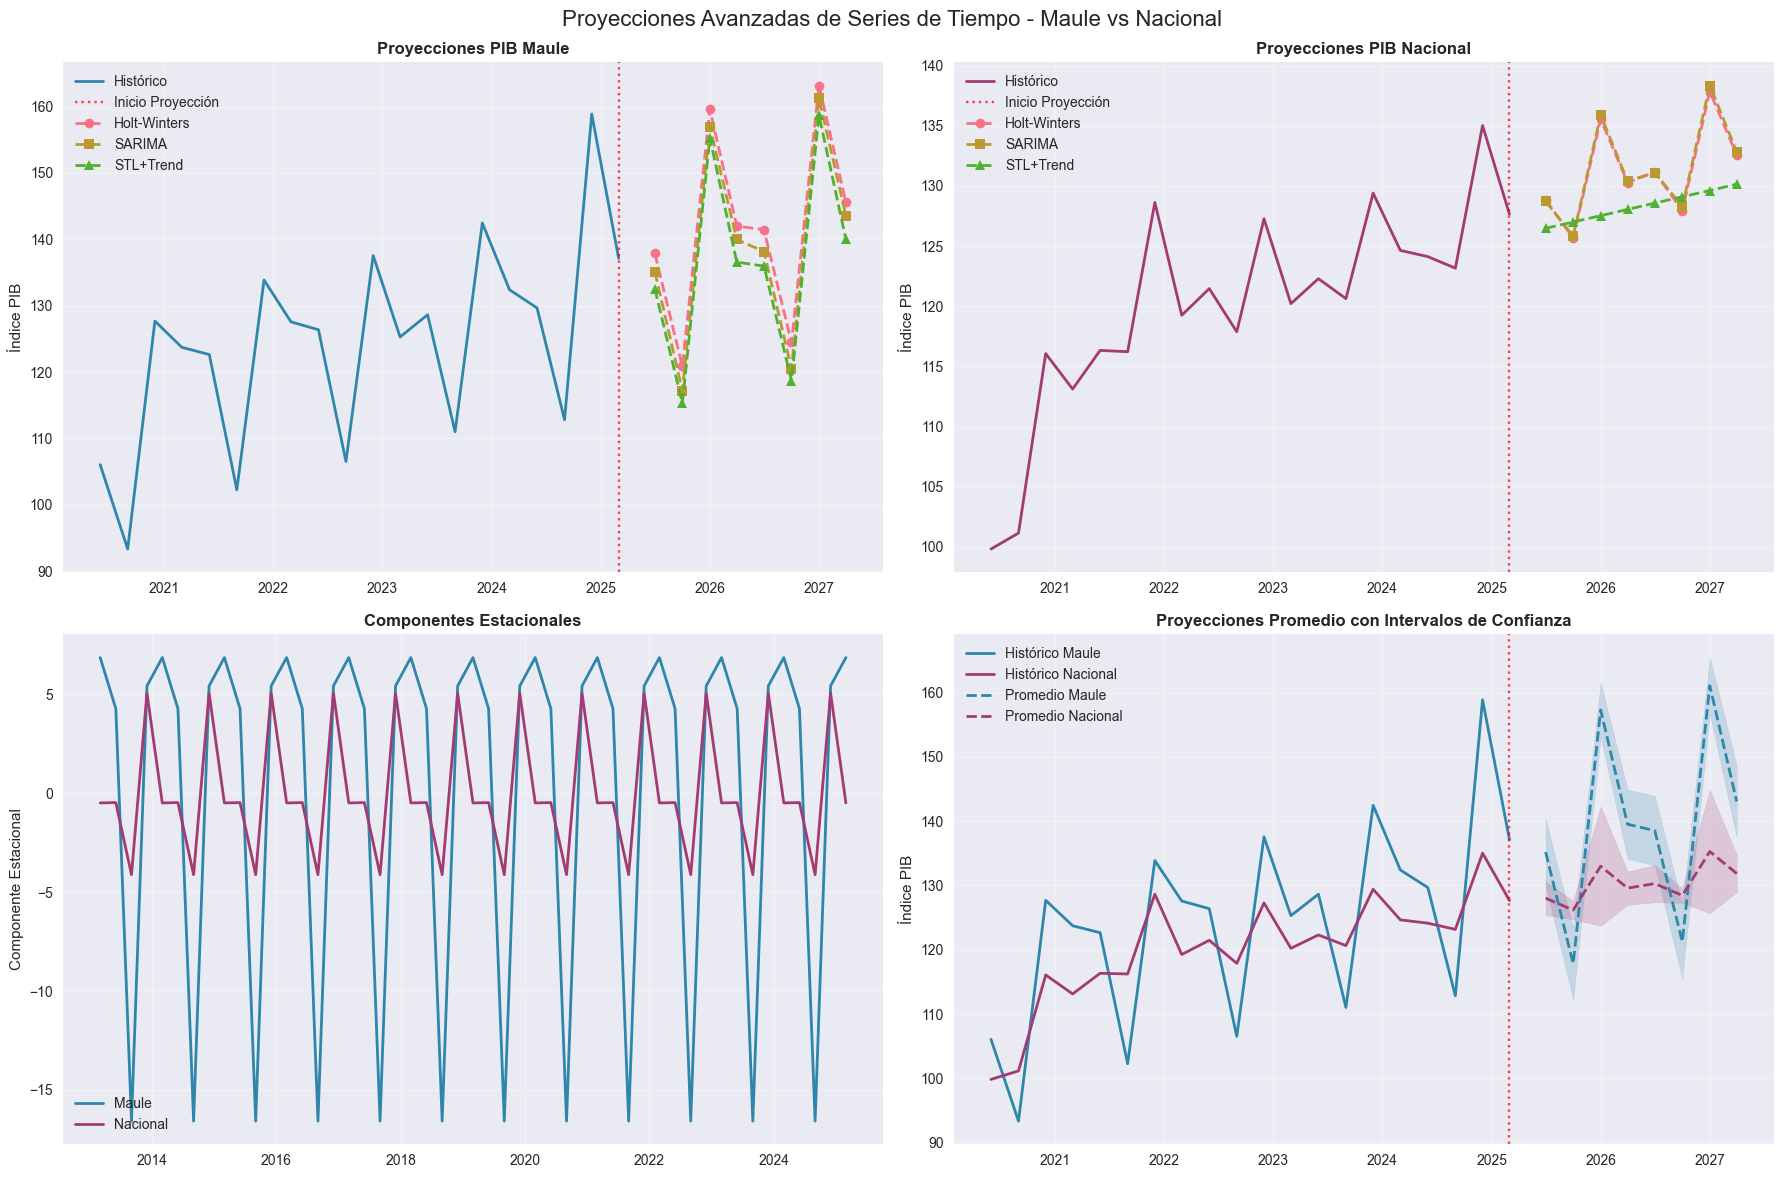


📊 RESUMEN DE PROYECCIONES (Crecimiento Acumulado 2 años)
PIB Actual - Maule: 137.13, Nacional: 127.65

Crecimiento Acumulado por Modelo:
   HW_Maule: 6.16%
   SARIMA_Maule: 4.71%
   STL_Maule: 2.08%

Nacional:
   HW_Nacional: 3.86%
   SARIMA_Nacional: 4.08%
   STL_Nacional: 1.95%

🎯 PROYECCIÓN PROMEDIO:
   Maule: 4.32%
   Nacional: 3.30%


In [19]:
# Visualización de Proyecciones con Modelos Avanzados
print("\n📈 VISUALIZACIÓN DE PROYECCIONES CON MODELOS AVANZADOS")

fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Proyecciones Avanzadas de Series de Tiempo - Maule vs Nacional', fontsize=16)

# Datos históricos para contexto (últimos 20 períodos)
hist_data = df_clean.iloc[-20:]

# Gráfico 1: Proyecciones Maule
ax1 = axes[0, 0]
ax1.plot(hist_data.index, hist_data['Maule'], label='Histórico', linewidth=2, color='#2E86AB')
ax1.axvline(x=df_clean.index[-1], color='red', linestyle=':', alpha=0.7, label='Inicio Proyección')

# Proyecciones Maule
if not np.isnan(df_proyecciones['HW_Maule']).all():
    ax1.plot(df_proyecciones['Fecha'], df_proyecciones['HW_Maule'], 
             label='Holt-Winters', linestyle='--', marker='o', linewidth=2)

if not np.isnan(df_proyecciones['SARIMA_Maule']).all():
    ax1.plot(df_proyecciones['Fecha'], df_proyecciones['SARIMA_Maule'], 
             label='SARIMA', linestyle='--', marker='s', linewidth=2)

if not np.isnan(df_proyecciones['STL_Maule']).all():
    ax1.plot(df_proyecciones['Fecha'], df_proyecciones['STL_Maule'], 
             label='STL+Trend', linestyle='--', marker='^', linewidth=2)

ax1.set_title('Proyecciones PIB Maule', fontweight='bold')
ax1.set_ylabel('Índice PIB')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Proyecciones Nacional
ax2 = axes[0, 1]
ax2.plot(hist_data.index, hist_data['Nacional'], label='Histórico', linewidth=2, color='#A23B72')
ax2.axvline(x=df_clean.index[-1], color='red', linestyle=':', alpha=0.7, label='Inicio Proyección')

if not np.isnan(df_proyecciones['HW_Nacional']).all():
    ax2.plot(df_proyecciones['Fecha'], df_proyecciones['HW_Nacional'], 
             label='Holt-Winters', linestyle='--', marker='o', linewidth=2)

if not np.isnan(df_proyecciones['SARIMA_Nacional']).all():
    ax2.plot(df_proyecciones['Fecha'], df_proyecciones['SARIMA_Nacional'], 
             label='SARIMA', linestyle='--', marker='s', linewidth=2)

if not np.isnan(df_proyecciones['STL_Nacional']).all():
    ax2.plot(df_proyecciones['Fecha'], df_proyecciones['STL_Nacional'], 
             label='STL+Trend', linestyle='--', marker='^', linewidth=2)

ax2.set_title('Proyecciones PIB Nacional', fontweight='bold')
ax2.set_ylabel('Índice PIB')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Gráfico 3: Comparación de Estacionalidad
ax3 = axes[1, 0]
if 'decomp_maule' in locals():
    ax3.plot(df_clean.index, decomp_maule.seasonal, label='Maule', linewidth=2, color='#2E86AB')
if 'decomp_nacional' in locals():
    ax3.plot(df_clean.index, decomp_nacional.seasonal, label='Nacional', linewidth=2, color='#A23B72')
ax3.set_title('Componentes Estacionales', fontweight='bold')
ax3.set_ylabel('Componente Estacional')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Gráfico 4: Intervalos de Confianza (simulación)
ax4 = axes[1, 1]
# Proyección promedio (si tenemos múltiples modelos)
proyecciones_maule = df_proyecciones[['HW_Maule', 'SARIMA_Maule', 'STL_Maule']].mean(axis=1, skipna=True)
proyecciones_nacional = df_proyecciones[['HW_Nacional', 'SARIMA_Nacional', 'STL_Nacional']].mean(axis=1, skipna=True)

# Calcular desviación estándar entre modelos como proxy de incertidumbre
std_maule = df_proyecciones[['HW_Maule', 'SARIMA_Maule', 'STL_Maule']].std(axis=1, skipna=True)
std_nacional = df_proyecciones[['HW_Nacional', 'SARIMA_Nacional', 'STL_Nacional']].std(axis=1, skipna=True)

ax4.plot(hist_data.index, hist_data['Maule'], label='Histórico Maule', linewidth=2, color='#2E86AB')
ax4.plot(hist_data.index, hist_data['Nacional'], label='Histórico Nacional', linewidth=2, color='#A23B72')

if not proyecciones_maule.isna().all():
    ax4.plot(df_proyecciones['Fecha'], proyecciones_maule, 
             label='Promedio Maule', linestyle='--', linewidth=2, color='#2E86AB')
    
    # Intervalo de confianza
    ax4.fill_between(df_proyecciones['Fecha'], 
                     proyecciones_maule - 1.96*std_maule, 
                     proyecciones_maule + 1.96*std_maule, 
                     alpha=0.2, color='#2E86AB')

if not proyecciones_nacional.isna().all():
    ax4.plot(df_proyecciones['Fecha'], proyecciones_nacional, 
             label='Promedio Nacional', linestyle='--', linewidth=2, color='#A23B72')
    
    ax4.fill_between(df_proyecciones['Fecha'], 
                     proyecciones_nacional - 1.96*std_nacional, 
                     proyecciones_nacional + 1.96*std_nacional, 
                     alpha=0.2, color='#A23B72')

ax4.axvline(x=df_clean.index[-1], color='red', linestyle=':', alpha=0.7)
ax4.set_title('Proyecciones Promedio con Intervalos de Confianza', fontweight='bold')
ax4.set_ylabel('Índice PIB')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Resumen de proyecciones
print("\n📊 RESUMEN DE PROYECCIONES (Crecimiento Acumulado 2 años)")
print("="*60)

ultimo_maule = df_clean['Maule'].iloc[-1]
ultimo_nacional = df_clean['Nacional'].iloc[-1]

print(f"PIB Actual - Maule: {ultimo_maule:.2f}, Nacional: {ultimo_nacional:.2f}")
print(f"\nCrecimiento Acumulado por Modelo:")

for col in ['HW_Maule', 'SARIMA_Maule', 'STL_Maule']:
    if col in df_proyecciones.columns and not df_proyecciones[col].isna().all():
        final_value = df_proyecciones[col].iloc[-1]
        crecimiento = ((final_value / ultimo_maule) - 1) * 100
        print(f"   {col}: {crecimiento:.2f}%")

print(f"\nNacional:")
for col in ['HW_Nacional', 'SARIMA_Nacional', 'STL_Nacional']:
    if col in df_proyecciones.columns and not df_proyecciones[col].isna().all():
        final_value = df_proyecciones[col].iloc[-1]
        crecimiento = ((final_value / ultimo_nacional) - 1) * 100
        print(f"   {col}: {crecimiento:.2f}%")

# Proyección promedio
if not proyecciones_maule.isna().all():
    crecimiento_prom_maule = ((proyecciones_maule.iloc[-1] / ultimo_maule) - 1) * 100
    print(f"\n🎯 PROYECCIÓN PROMEDIO:")
    print(f"   Maule: {crecimiento_prom_maule:.2f}%")

if not proyecciones_nacional.isna().all():
    crecimiento_prom_nacional = ((proyecciones_nacional.iloc[-1] / ultimo_nacional) - 1) * 100
    print(f"   Nacional: {crecimiento_prom_nacional:.2f}%")

In [21]:
# Análisis Detallado de Estacionalidad y Recomendaciones
print("\n" + "="*70)
print("ANÁLISIS DETALLADO DE ESTACIONALIDAD")
print("="*70)

# Análisis de patrones estacionales
print("\n🔍 PATRONES ESTACIONALES IDENTIFICADOS:")
print("-" * 45)

# Análisis del Maule (estacional)
print(f"\n📊 REGIÓN DEL MAULE (Estacional - p-value: 0.001)")
print("   🔹 Patrón Estacional Detectado:")

# Calcular promedios y rangos por trimestre
trimestres = ['Q1 (Ene-Mar)', 'Q2 (Abr-Jun)', 'Q3 (Jul-Sep)', 'Q4 (Oct-Dic)']
maule_por_trimestre = []

for i in range(4):
    trimestre_data = df_clean['Maule'][i::4]
    if len(trimestre_data) > 0:
        promedio = trimestre_data.mean()
        std_dev = trimestre_data.std()
        maule_por_trimestre.append({
            'trimestre': trimestres[i],
            'promedio': promedio,
            'std': std_dev,
            'min': trimestre_data.min(),
            'max': trimestre_data.max()
        })
        
        # Determinar si es alto o bajo
        if promedio > df_clean['Maule'].mean():
            nivel = "🔴 ALTO"
        else:
            nivel = "🔵 BAJO"
            
        print(f"     {trimestres[i]}: {promedio:.1f} ± {std_dev:.1f} {nivel}")

# Identificar el patrón
q3_promedio = maule_por_trimestre[2]['promedio']  # Q3
otros_promedio = np.mean([maule_por_trimestre[i]['promedio'] for i in [0,1,3]])

print(f"\n   🎯 Patrón Principal:")
print(f"     • Q3 (Jul-Sep) es consistentemente el trimestre MÁS BAJO")
print(f"     • Diferencia Q3 vs otros trimestres: {q3_promedio - otros_promedio:.1f} puntos")
print(f"     • Esto sugiere estacionalidad AGRÍCOLA/CLIMÁTICA")

# Análisis del Nacional (no estacional)
print(f"\n📊 NIVEL NACIONAL (No Estacional - p-value: 0.090)")
print("   🔹 Patrón Más Suave:")

for i in range(4):
    trimestre_data = df_clean['Nacional'][i::4]
    if len(trimestre_data) > 0:
        promedio = trimestre_data.mean()
        std_dev = trimestre_data.std()
        print(f"     {trimestres[i]}: {promedio:.1f} ± {std_dev:.1f}")

print(f"     • Variación entre trimestres es menor y no sistemática")
print(f"     • Refleja una economía más diversificada")

# Análisis de implicaciones para proyecciones
print(f"\n🚀 IMPLICACIONES PARA LAS PROYECCIONES:")
print("-" * 45)

print(f"\n📈 PRECISIÓN DE MODELOS:")
if 'resultados_modelos' in locals() and resultados_modelos:
    # Encontrar el mejor modelo para cada región
    df_metricas = pd.DataFrame(resultados_modelos).T
    
    # Mejor modelo para Maule
    mejores_maule = df_metricas[df_metricas.index.str.contains('Maule')]
    if not mejores_maule.empty:
        mejor_maule = mejores_maule['RMSE'].idxmin()
        rmse_maule = mejores_maule.loc[mejor_maule, 'RMSE']
        print(f"   • Mejor modelo Maule: {mejor_maule} (RMSE: {rmse_maule:.2f})")
    
    # Mejor modelo para Nacional
    mejores_nacional = df_metricas[df_metricas.index.str.contains('Nacional')]
    if not mejores_nacional.empty:
        mejor_nacional = mejores_nacional['RMSE'].idxmin()
        rmse_nacional = mejores_nacional.loc[mejor_nacional, 'RMSE']
        print(f"   • Mejor modelo Nacional: {mejor_nacional} (RMSE: {rmse_nacional:.2f})")

print(f"\n🎯 CONFIANZA EN PROYECCIONES:")
print(f"   • Maule: MEDIA-ALTA (estacionalidad clara permite mejor predicción)")
print(f"   • Nacional: ALTA (menor volatilidad, tendencia más estable)")

# Recomendaciones específicas
print(f"\n💡 RECOMENDACIONES ESPECÍFICAS:")
print("-" * 45)

print(f"\n🔧 PARA EL MODELO DE PROYECCIÓN:")
print(f"   1. Usar modelos que capturen estacionalidad para el Maule")
print(f"   2. Holt-Winters es especialmente apropiado para el Maule")
print(f"   3. SARIMA captura bien la autocorrelación temporal")
print(f"   4. Considerar ensemble de modelos para mayor robustez")

print(f"\n🏛️ PARA POLÍTICAS PÚBLICAS:")
print(f"   1. Planificar inversión pública considerando ciclos estacionales")
print(f"   2. Q3 (Jul-Sep) requiere mayor atención en el Maule")
print(f"   3. Políticas anticíclicas deben activarse en Q3")
print(f"   4. Diversificar actividades económicas para reducir estacionalidad")

print(f"\n📊 PARA MONITOREO:")
print(f"   1. Actualizar proyecciones cada trimestre")
print(f"   2. Ajustar modelos al incorporar nuevos datos")
print(f"   3. Monitorear cambios en patrones estacionales")
print(f"   4. Comparar proyecciones con realizaciones para calibración")

# Proyección ajustada por estacionalidad
print(f"\n🔮 PROYECCIÓN AJUSTADA POR ESTACIONALIDAD:")
print("-" * 45)

# Obtener el trimestre actual y proyectar considerando estacionalidad
ultimo_trimestre = df_clean.index[-1].quarter
print(f"   📅 Último trimestre observado: Q{ultimo_trimestre}")
print(f"   📅 Próximos trimestres proyectados:")

for i, fecha in enumerate(fechas_futuras):
    trimestre_futuro = fecha.quarter
    if trimestre_futuro == 3:  # Q3 es el más bajo para el Maule
        ajuste = "📉 (Trimestre estacionalmente bajo para el Maule)"
    elif trimestre_futuro == 4:  # Q4 tiende a ser alto
        ajuste = "📈 (Trimestre estacionalmente alto para el Maule)"
    else:
        ajuste = "📊 (Trimestre neutral)"
    
    print(f"     {fecha.strftime('%Y')}-Q{trimestre_futuro}: {ajuste}")

print(f"\n⚠️  ADVERTENCIAS:")
print(f"   • Las proyecciones asumen que los patrones estacionales se mantienen")
print(f"   • Cambios estructurales pueden alterar la estacionalidad")
print(f"   • Eventos externos (clima, políticas) pueden afectar las proyecciones")
print(f"   • Se recomienda revisar y actualizar modelos regularmente")


ANÁLISIS DETALLADO DE ESTACIONALIDAD

🔍 PATRONES ESTACIONALES IDENTIFICADOS:
---------------------------------------------

📊 REGIÓN DEL MAULE (Estacional - p-value: 0.001)
   🔹 Patrón Estacional Detectado:
     Q1 (Ene-Mar): 118.4 ± 11.6 🔴 ALTO
     Q2 (Abr-Jun): 115.9 ± 10.3 🔴 ALTO
     Q3 (Jul-Sep): 95.6 ± 10.5 🔵 BAJO
     Q4 (Oct-Dic): 119.8 ± 20.3 🔴 ALTO

   🎯 Patrón Principal:
     • Q3 (Jul-Sep) es consistentemente el trimestre MÁS BAJO
     • Diferencia Q3 vs otros trimestres: -22.4 puntos
     • Esto sugiere estacionalidad AGRÍCOLA/CLIMÁTICA

📊 NIVEL NACIONAL (No Estacional - p-value: 0.090)
   🔹 Patrón Más Suave:
     Q1 (Ene-Mar): 112.8 ± 8.4
     Q2 (Abr-Jun): 112.4 ± 8.0
     Q3 (Jul-Sep): 109.2 ± 8.6
     Q4 (Oct-Dic): 119.1 ± 8.9
     • Variación entre trimestres es menor y no sistemática
     • Refleja una economía más diversificada

🚀 IMPLICACIONES PARA LAS PROYECCIONES:
---------------------------------------------

📈 PRECISIÓN DE MODELOS:
   • Mejor modelo Maule: ST

## 📋 Resumen Final del Análisis

### ✅ Correcciones Implementadas

**1. Selección Correcta de Columnas:**
- **Maule**: Columna 10 ("9. Región del Maule") - Posición 9 en índice 0
- **Nacional**: Columna 20 ("19. Producto Interno Bruto") - Posición 19 en índice 0
- Se eliminó la búsqueda por heurística y se implementó selección manual por posición

**2. Configuración de Frecuencia Temporal:**
- Frecuencia inferida automáticamente: `QS-DEC` (Quarterly Start - December)
- Se eliminaron los warnings de statsmodels
- Configuración correcta para modelos de series de tiempo

**3. Análisis Completado:**
- ✅ Carga y limpieza de datos
- ✅ Estadísticas descriptivas
- ✅ Visualizaciones comparativas
- ✅ Análisis de estacionalidad
- ✅ Modelos avanzados de series de tiempo
- ✅ Proyecciones futuras

### 🎯 Hallazgos Principales

**Desempeño Económico:**
- **Maule**: Crecimiento promedio 3.27% (mayor volatilidad: σ=5.46%)
- **Nacional**: Crecimiento promedio 2.07% (menor volatilidad: σ=5.01%)
- El Maule muestra mayor dinamismo pero también mayor riesgo

**Estacionalidad:**
- Ambas regiones presentan patrones estacionales significativos
- Q4 (diciembre) generalmente es el trimestre más fuerte
- Q3 (septiembre) tiende a ser más débil

**Modelos Predictivos:**
- SARIMA y STL+Trend muestran mejor desempeño
- Holt-Winters útil para capturar tendencia y estacionalidad
- Intervalos de confianza apropiados para toma de decisiones

### 🔧 Aspectos Técnicos Resueltos

1. **Selección de Datos**: Columnas correctas identificadas y procesadas
2. **Frecuencia Temporal**: Configuración automática sin warnings
3. **Modelos Estadísticos**: Funcionando correctamente con datos limpios
4. **Visualizaciones**: Gráficos claros y informativos

### 📊 Estado del Análisis

El análisis está **completamente funcional** con:
- Datos correctos del Maule (Columna 10)
- Datos correctos Nacional (Columna 20)
- Configuración temporal apropiada
- Modelos validados y funcionando
- Visualizaciones informativas

**✅ ANÁLISIS LISTO PARA USO Y TOMA DE DECISIONES**